In [ ]:
# Competition hosted by Kaggle
# URL: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
# Predicting the sales price of a house, using Tensorflow 2.0 Artificial Neural Networks.

In [1]:
#%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.show()
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
combine = [train,test]

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

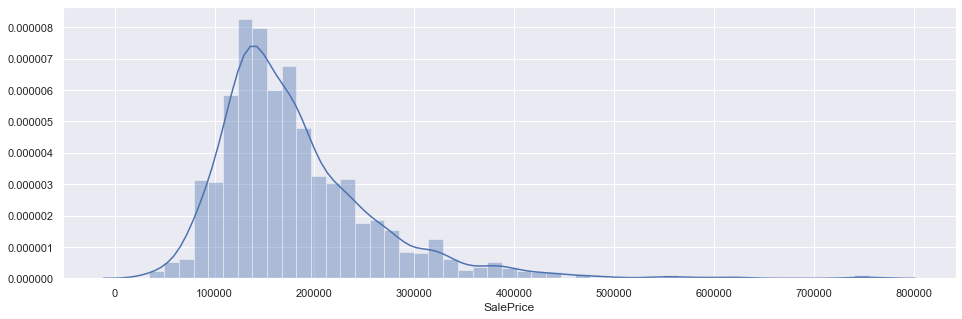

In [6]:
plt.figure(figsize=(16,5))
sns.distplot(train['SalePrice'])

In [7]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
# Visualising correlation between numerical variables.

In [9]:
corr_matrix = train.corr()

In [10]:
columns = corr_matrix.nlargest(10,'SalePrice')['SalePrice'].index

In [11]:
cm = np.corrcoef(train[columns].values.T)

(10, 0)

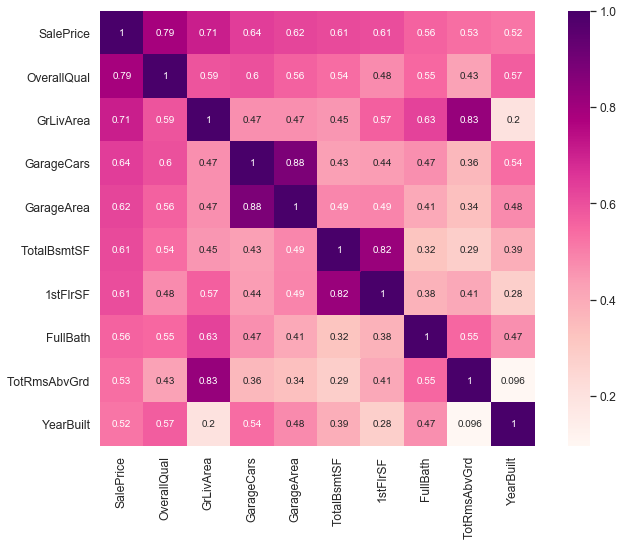

In [12]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.1)
sns.heatmap(cm,cbar=True, annot = True, square=True, cmap = "RdPu",annot_kws = {"size": 10},
           yticklabels=columns.values, xticklabels=columns.values)
plt.ylim(10,0)

In [13]:
# Graphs for the top couple of correlated variables to see if there are any outliers. 

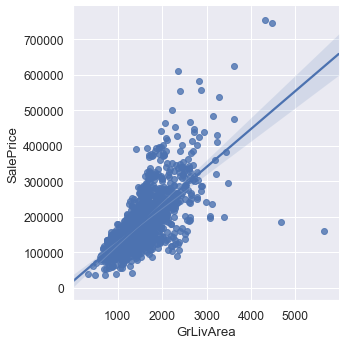

In [14]:
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)

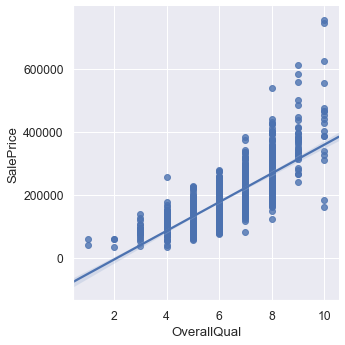

In [15]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train)

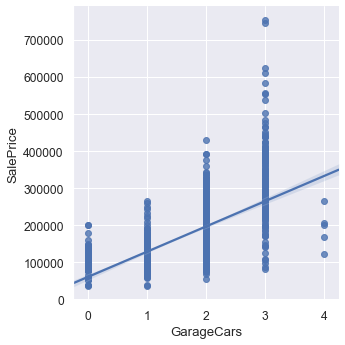

In [16]:
sns.lmplot(x='GarageCars',y='SalePrice',data=train)

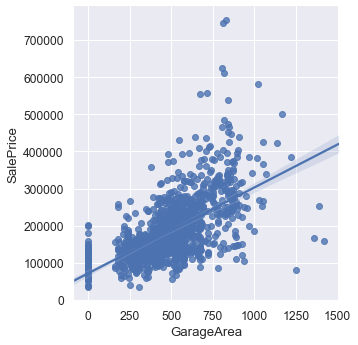

In [17]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train)

In [18]:
train.loc[train['GrLivArea'] > 4000,['GrLivArea','SalePrice']]

,GrLivArea,SalePrice
523,4676,184750
691,4316,755000
1182,4476,745000
1298,5642,160000


In [19]:
# Drop the outliers found in the first graph
train.drop(523,inplace=True)
train.drop(1298,inplace=True)

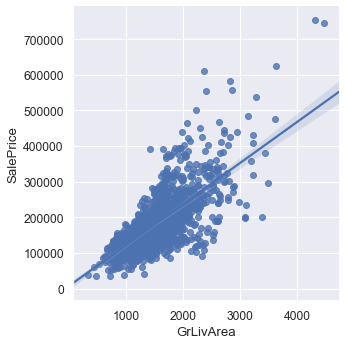

In [20]:
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)

In [21]:
train.loc[train['GrLivArea'] > 4000,['GrLivArea','SalePrice']]

,GrLivArea,SalePrice
691,4316,755000
1182,4476,745000


In [22]:
for dataset in combine:
    print(pd.isna(dataset).sum().nlargest(40))

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
Id                 0
MSSubClass         0
MSZoning           0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
dtype: int64
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78


In [23]:
# Filling in the missing values Most of these will be a simple fix.

In [24]:
# Working on the train set

In [25]:
pd.isna(train).sum().nlargest(32)

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
Id                 0
MSSubClass         0
MSZoning           0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
dtype: int64

In [26]:
# PoolQC NA represent no pool, so lets fill that in. 

In [27]:
NoneFill = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2',
           'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure','GarageQual','GarageCond',
           'BsmtExposure','MasVnrType']
for column in NoneFill:
    train[column].fillna("None",inplace=True)
    pd.isna(train[NoneFill]).sum()

In [28]:
# I will have to impute the value for LotFrontage.
# I could look at the average lotfrontage for the neighbourhood.

In [29]:
# Fills in NA values using average LotFrontage for each neighborhood.
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [30]:
train['GarageYrBlt'].fillna(0,inplace=True)
pd.isna(train['GarageYrBlt']).sum()

0

In [31]:
pd.isna(train).sum().nlargest(10)

MasVnrArea     8
Electrical     1
Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
dtype: int64

In [32]:
train['MasVnrArea'].fillna(0,inplace=True)
pd.isna(train['MasVnrArea']).sum()

0

In [33]:
train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)

In [34]:
pd.isna(train).sum().nlargest(10)

Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
LandContour    0
Utilities      0
dtype: int64

In [35]:
# Now I will begin filling in the missing values for the test set
pd.isna(test).sum().nlargest(35)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Utilities          2
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Exterior1st        1
Exterior2nd        1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
KitchenQual        1
GarageCars         1
GarageArea         1
SaleType           1
Id                 0
MSSubClass         0
dtype: int64

In [36]:
# Fill missing values with None
fillnone = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageFinish','GarageQual','GarageCond','GarageType',
           'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']

In [37]:
for i in fillnone:
    test[i].fillna('None',inplace=True)
    print(pd.isna(test[i]).sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [38]:
pd.isna(test).sum().nlargest(20)

LotFrontage     227
GarageYrBlt      78
MasVnrType       16
MasVnrArea       15
MSZoning          4
Utilities         2
BsmtFullBath      2
BsmtHalfBath      2
Functional        2
Exterior1st       1
Exterior2nd       1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
KitchenQual       1
GarageCars        1
GarageArea        1
SaleType          1
Id                0
dtype: int64

In [39]:
test[pd.isna(test['MasVnrType'])][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


In [40]:
test.loc[test['MasVnrArea'] == 198.0, 'MasVnrType']

245       Stone
421     BrkFace
1085      Stone
1150        NaN
1372    BrkFace
1442      Stone
Name: MasVnrType, dtype: object

In [41]:
test.iloc[1150]

Id                  2611
MSSubClass            20
MSZoning              RL
LotFrontage          124
LotArea            27697
                  ...   
MiscVal                0
MoSold                11
YrSold              2007
SaleType             COD
SaleCondition    Abnorml
Name: 1150, Length: 80, dtype: object

In [42]:
test.loc[test['Id'] == 2611,'MasVnrType'] = 'Stone'

In [43]:
test[pd.isna(test['MasVnrType'])][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


In [44]:
test['MasVnrType'].fillna('None',inplace=True)
print(pd.isna(test['MasVnrType']).sum())

test['MasVnrArea'].fillna(0,inplace=True)
print(pd.isna(test['MasVnrArea']).sum())

0
0


In [45]:
test[pd.isna(test['MasVnrType'])][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea


In [46]:
pd.isna(test).sum().nlargest(20)

LotFrontage     227
GarageYrBlt      78
MSZoning          4
Utilities         2
BsmtFullBath      2
BsmtHalfBath      2
Functional        2
Exterior1st       1
Exterior2nd       1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
KitchenQual       1
GarageCars        1
GarageArea        1
SaleType          1
Id                0
MSSubClass        0
LotArea           0
dtype: int64

In [47]:
# Carry on fixing null values. 

# Then start making all the data model friendly. (Dummy variables, label encoder)

In [48]:
# Fill in the missing Lot Frontage values by using the average lot frontage for each neighbourhood
test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [49]:
test['GarageYrBlt'].fillna(0,inplace=True)
pd.isna(test['GarageYrBlt']).sum()

0

In [50]:
# Fill in the missing MSZoning values by using the mode MSZoning for each MSSubClass
test['MSZoning'] = test.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
pd.isna(test['MSZoning']).sum()

0

In [51]:
pd.isna(test).sum().nlargest(15)

Utilities       2
BsmtFullBath    2
BsmtHalfBath    2
Functional      2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
KitchenQual     1
GarageCars      1
GarageArea      1
SaleType        1
Id              0
dtype: int64

In [52]:
modefill = ['Utilities','BsmtFullBath','BsmtHalfBath','Exterior1st','Exterior2nd','SaleType','KitchenQual']

for i in modefill:
    test[i].fillna(test[i].mode()[0],inplace = True)

In [53]:
pd.isna(test).sum().nlargest(9)

Functional     2
BsmtFinSF1     1
BsmtFinSF2     1
BsmtUnfSF      1
TotalBsmtSF    1
GarageCars     1
GarageArea     1
Id             0
MSSubClass     0
dtype: int64

In [54]:
test['Functional'].fillna('Typ',inplace = True) 

In [55]:
zerofill = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageCars','GarageArea']
for i in zerofill:
    test[i].fillna(0,inplace = True)

In [56]:
pd.isna(test).sum().nlargest(3)

Id            0
MSSubClass    0
MSZoning      0
dtype: int64

In [57]:
# Done with all the NA values

In [58]:
# Fix skewed variables
from scipy import stats

In [59]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = list(train.select_dtypes(include=numeric_dtypes).drop('SalePrice',axis=1).columns)

In [60]:
num_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [61]:
full_df = train.append(test)

In [62]:
skew_features = full_df[num_features].apply(lambda x: stats.skew(x)).sort_values(ascending=False)

In [63]:
skew_features = skew_features[abs(skew_features) > 0.75]
skew_features

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
MSSubClass        1.375131
1stFlrSF          1.257286
GrLivArea         1.068750
LotFrontage       1.056433
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
GarageYrBlt      -3.904632
dtype: float64

In [64]:
for feat in skew_features.index:
    full_df[feat] = np.log1p(full_df[feat])

In [65]:
ind = len(train)
train = full_df.iloc[:ind]
test = full_df.iloc[ind:]
combine = [train,test]

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
# Label encoding the following columns
encodecols = ['MSSubClass','Street','Alley','Utilities','LandSlope','ExterQual','ExterCond',
              'BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2',
             'HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish',
              'GarageQual','GarageCond','PoolQC','Fence']
for dataset in combine:
    for i in encodecols:
        lbe = LabelEncoder()
        lbe.fit(list(dataset[i].values))
        dataset[i] = lbe.transform(list(dataset[i].values))

C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [68]:
full_df = train.append(test)

In [69]:
full_df = pd.get_dummies(full_df,drop_first=True)

In [70]:
ind = len(train)

In [71]:
train = full_df.iloc[:ind]

In [72]:
test = full_df.iloc[ind:]

In [73]:
combine = [train,test]

In [74]:
temp_train_Id = train['Id']
temp_test_Id = test['Id']

In [75]:
for dataset in combine:
    dataset.drop('Id',axis=1,inplace=True)

C:\Users\clint\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler,Normalizer,RobustScaler
scaler = StandardScaler()

In [77]:
# Scaling the data. Fitting and transforming on the train set, and only transforming the test set
for col in (train.columns):
    if col != 'SalePrice':
        train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))
        test[col] = scaler.transform(test[col].values.reshape(-1,1))
        
    else:
        pass

#train['SalePrice'] = scaler.fit_transform(train[col].values.reshape(-1,1))

C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [78]:
test['SalePrice'] = test['SalePrice'].fillna(0)

C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
train['SalePrice'] = train['SalePrice'].apply(lambda x: np.log(x))

C:\Users\clint\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']

In [81]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

X_new = np.asarray(X)
y_new = np.asarray(y)

In [82]:
# Importing the relevant tensorflow packages
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as keras

In [83]:
# Define a function that returns the model it compiles.
def build_model(hp):
    model = Sequential()
    
    # Hyperparameters tuning
    hp_units_first = hp.Int('input_units', min_value=4, max_value=512, step=2)
    model.add(Dense(hp_units_first, activation = 'relu'))
    hp_dropout_first = hp.Choice('input_dropout', values=[0.0,0.2,0.4])
    model.add(Dropout(hp_dropout_first))
    model.add(BatchNormalization())
    # Custom number of layers
    number_of_layers = hp.Choice('number_layers', values=[0,1,2,3])
    if number_of_layers != 0:
        with hp.conditional_scope('number_layers',[number_of_layers]):
            for number_layers in range(number_of_layers):
                number_layers = number_layers+1
                hp_units = hp.Int(name=('unit ' + str(number_layers)), min_value=1,
                                  max_value=512, step=2)
                model.add(Dense(hp_units, activation='relu'))
                hp_dropout = hp.Choice(name = ('dropout ' + str(number_layers)), values=[0.0,0.2] )
                model.add(Dropout(hp_dropout))
                model.add(BatchNormalization())
                
                
    model.add(Dense(units=1))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimzer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                 loss='mse',
                 metrics=['mse'])
    
    return model

In [84]:
import time
time.time()

1638446544.9092884

In [85]:
# Defining the tuner with the Hyperband algorithm
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                    max_epochs=200,
                    factor=3,
                    directory=f'my_dir_244_{time.time()}',
                    project_name=f'first_keras_tuner_442_{time.time()}')

In [86]:
stop_early = EarlyStopping(monitor='val_loss',patience=10)

In [87]:
# Searching for the best parameters
tuner.search(x=X_train,y=y_train,epochs=200,validation_data=(X_test,y_test),callbacks=[stop_early],batch_size=32)

Trial 254 Complete [00h 00m 10s]
val_loss: 0.01973315724703275

Best val_loss So Far: 0.016989962627354277
Total elapsed time: 00h 14m 31s
INFO:tensorflow:Oracle triggered exit


In [88]:
best_hps = tuner.get_best_hyperparameters()[0]

In [89]:
# Best parameters
best_hps.values

{'input_units': 78,
 'input_dropout': 0.4,
 'number_layers': 0,
 'learning_rate': 0.01,
 'tuner/epochs': 200,
 'tuner/initial_epoch': 67,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': 'f441b3c7449e12b47bbd7ad4b35e4ede'}

In [90]:
# Building the final model using the best parameters found in the hyperband search
model_final = tuner.hypermodel.build(best_hps)
model_final.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),
          callbacks=[EarlyStopping(monitor='val_loss',patience=300,restore_best_weights=True)],
          batch_size=32)

Train on 1020 samples, validate on 438 samples
Epoch 1/300
1020/1020 [==============================] - 1s 711us/sample - loss: 139.9404 - mse: 139.9404 - val_loss: 122.0731 - val_mse: 122.0731
Epoch 2/300
1020/1020 [==============================] - 0s 58us/sample - loss: 128.1111 - mse: 128.1111 - val_loss: 109.8551 - val_mse: 109.8551
Epoch 3/300
1020/1020 [==============================] - 0s 58us/sample - loss: 113.5696 - mse: 113.5696 - val_loss: 94.6917 - val_mse: 94.6917
Epoch 4/300
1020/1020 [==============================] - 0s 58us/sample - loss: 96.7737 - mse: 96.7737 - val_loss: 79.4149 - val_mse: 79.4149
Epoch 5/300
1020/1020 [==============================] - 0s 55us/sample - loss: 78.9798 - mse: 78.9798 - val_loss: 61.5815 - val_mse: 61.5815
Epoch 6/300
1020/1020 [==============================] - 0s 56us/sample - loss: 61.0677 - mse: 61.0677 - val_loss: 45.9249 - val_mse: 45.9249
Epoch 7/300
1020/1020 [==============================] - 0s 57us/sample - loss: 44.3092 - 

Epoch 118/300
1020/1020 [==============================] - 0s 55us/sample - loss: 0.0220 - mse: 0.0220 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 119/300
1020/1020 [==============================] - 0s 55us/sample - loss: 0.0194 - mse: 0.0194 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 120/300
1020/1020 [==============================] - 0s 54us/sample - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 121/300
1020/1020 [==============================] - 0s 54us/sample - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 122/300
1020/1020 [==============================] - 0s 56us/sample - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 123/300
1020/1020 [==============================] - 0s 54us/sample - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0219 - val_mse: 0.0219
Epoch 124/300
1020/1020 [==============================] - 0s 53us/sample - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 125/300
1020/1

1020/1020 [==============================] - 0s 54us/sample - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0425 - val_mse: 0.0425
Epoch 235/300
1020/1020 [==============================] - 0s 56us/sample - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0474 - val_mse: 0.0474
Epoch 236/300
1020/1020 [==============================] - 0s 54us/sample - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0423 - val_mse: 0.0423
Epoch 237/300
1020/1020 [==============================] - 0s 55us/sample - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0509 - val_mse: 0.0509
Epoch 238/300
1020/1020 [==============================] - 0s 54us/sample - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 239/300
1020/1020 [==============================] - 0s 55us/sample - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 240/300
1020/1020 [==============================] - 0s 55us/sample - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0419 - val_mse: 0.0419
Epoch 241/300
1020/1020 [=========

In [91]:
tf_losses = pd.DataFrame(model_final.history.history)

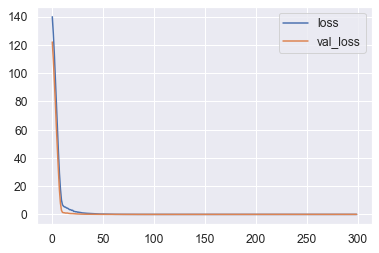

In [92]:
# Plotting the loss and the validation loss
tf_losses[['loss','val_loss']].plot()

In [93]:
# Predicting and saving the results for potential submission
import datetime
import os
save = 0
if (save == 1):
    folder_name = "Results"
    sub_folder =  str(datetime.datetime.now().day) + " Day " + str(datetime.datetime.now().month) + " Month"
    hour_minute_second = str(datetime.datetime.now().hour) +" Hours " + str(datetime.datetime.now().minute) + " Minutes " + str(datetime.datetime.now().second) + " Seconds"
    
    os.makedirs(folder_name,exist_ok=True)
    os.makedirs('Results/'+sub_folder,exist_ok=True)
    os.makedirs('Results/'+sub_folder,exist_ok=True)
    os.makedirs('Results/'+sub_folder+"/"+hour_minute_second,exist_ok=True)
    data = test.drop('SalePrice',axis=1)
    test_df2 = np.asarray(data)
    
    y_pred = pd.DataFrame(model_final.predict(test_df2),columns=['SalePrice'])
    y_pred = pd.concat([temp_test_Id,y_pred],axis=1)
    y_pred['SalePrice'] = y_pred['SalePrice'].apply(lambda x: np.exp(x))
    y_pred.to_csv('Results/'+sub_folder+'/'+hour_minute_second+'/'+'ANN.csv',index=False)